# 벡터의 유사도

문서의 유사도는 주로 문서들 간에 동일한 단어 또는 비슷한 단어가 얼마나 공통적으로 많이 사용되었는지에 의존한다. 

<br>

문서의 유사도의 성능은 각 문서의 단어들을 어떤 방법으로 수치화하여 표현했는지(DTM, Word2Vec 등), 문서 간의 단어들의 차이를 어떤 방법(유클리드 거리, 코사인 유사도 등)으로 계산했는지에 달려있다.

## 1. 코사인 유사도

단어를 수치화할 수 있는 방법을 이해했다면 이러한 표현 방법에 대해서 코사인 유사도를 이용하여 문서의 유사도를 구하는게 가능하다.

#### 1) 정의
두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미한다.

두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 된다.

즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다

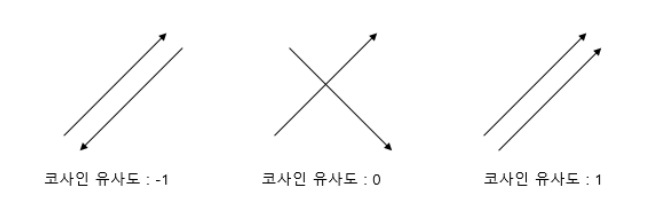

문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 된다. 

## 예시
문서1 : 저는 사과 좋아요

문서2 : 저는 바나나 좋아요

문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

세 문서에 대해서 문서 단어 행렬을 만든다.

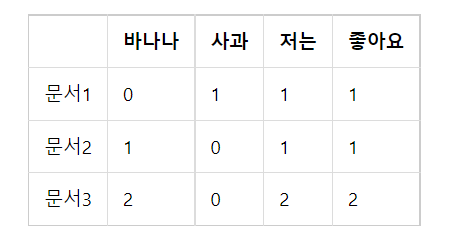

코사인 유사도를 구하는 함수를 구현하고 각 문서 벡터 간의 유사도를 계산해보자

눈 여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것이다.

앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 했다.

하지만 문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐이다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이다.


<br>

#### 쓰일만한 곳

문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서라고 해봅시다. 그리고 문서 A와 문서 C의 문서의 길이는 거의 차이가 나지 않지만, 문서 B의 경우 문서 A의 길이보다 두 배의 길이를 가진다고 가정하자

이런 경우 유클리드 거리로 유사도를 연산하면 문서 A가 문서 B보다 문서 C와 유사도가 더 높게 나오는 상황이 발생할 수 있다. 이는 유사도 연산에 문서의 길이가 영향을 받았기 때문인데, 이런 경우 코사인 유사도가 해결책이 될 수 있다. 코사인 유사도는 유사도를 구할 때 벡터의 방향(패턴)에 초점을 두므로 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있다.

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1]) # 문서 단어 벡터
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


## 유사도를 이용한 영화 추천 시스템 구현

캐글에서 사용되었던 영화 데이터셋을 가지고 TF-IDF, 코사인 유사도만으로 영화의 줄거리에 기반하여 영화를 추천하자

여기서는 영화 제목과 줄거이로 유사도를 구할 것이다. 좋아하는 영화를 입력하면 해당 영화의 줄거리와 유사한 줄거리의 영화를 추천하는 시스템 만들자

In [ ]:
# nlp는 판다스를 사용할 일이 많을 것 같다.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('/content/drive/MyDrive/학교 계정/프로그래밍 언어 공부 자료/인공지능/NLP/위키독스 자연어 처리/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

줄거리의 TF-IDF를 구해서 유사도를 구할 것이다. TF-IDF는 NULL이 있으면 에러가 발생하니 결측치를 제거하자

In [ ]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [ ]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

TF-IDF 행렬의 크기는 20,000의 행을 가지고 47,847의 열을 가지는 행렬입니다. 다시 말해 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미한다. 이를 코사인 유사도를 구하자

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview']) # 이게 데이터 인덱스 순서로 들어가나봐
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


무조건 정사각 모양이다. 이는 20000개의 문서 벡터와 자기 자신을 포함한 20000개의 문서 벡터간의 유사도가 기록되어있다.(하나의 문서와 다른 문서들과의 유사도가 다 기록되어 있는 것이다.)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix) # 따라서 코사인 메트리스도 인덱스 순서로 들어가고
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [ ]:
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
data['title'][:2]

0    Toy Story
1      Jumanji
Name: title, dtype: object

In [ ]:
for i in data.index[:2]:
  print(i)

0
1


In [ ]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Toy Story']
print(idx)

0


In [ ]:
title = "The Dark Knight Rises"

idx = title_to_index[title] # 다크나이트의 인덱스

# 해당 영화와 모든 영화와의 유사도를 가져온다. -> 다크나이트와 다른 문서들간의 유사도 한 행 1행 2만 열
sim_scores = list(enumerate(cosine_sim[idx]))
len(sim_scores)

20000

In [ ]:

# 유사도에 따라 영화들을 정렬한다.
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# 가장 유사한 10개의 영화를 받아온다.
sim_scores = sim_scores[1:11]

# 가장 유사한 10개의 영화의 인덱스를 얻는다.
movie_indices = [idx[0] for idx in sim_scores]

# 가장 유사한 10개의 영화의 제목을 리턴한다. = fancy 인덱싱
data['title'].iloc[movie_indices]

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

# 여러가지 유사도 기법

1.유클리드 거리

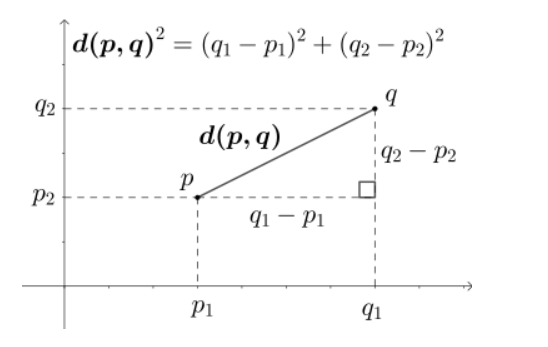

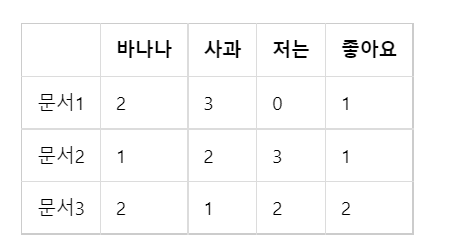

#### EX

단어의 개수가 4개이므로 4차원 공간에서 거리를 구하는 것이다. 4차원 공간에 문서1, 2, 3을 배치한 것과 같다.

-> 문서 Q 중에서 문서 1, 2, 3 중 가장 유사한 문서를 찾고자 한다.

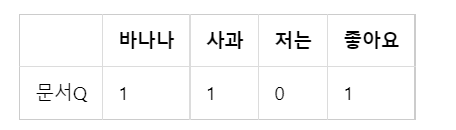

그냥 Q와 다른 벡터와의 거리를 구하면 된다.

값이 작다는 것이 문서 간 거리가 가장 가깝다는 것을 의미한다.

In [ ]:
import numpy as np

def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))
doc3 = np.array((2,1,2,2))
docQ = np.array((1,1,0,1))

print('문서1과 문서Q의 거리 :',dist(doc1,docQ))
print('문서2과 문서Q의 거리 :',dist(doc2,docQ))
print('문서3과 문서Q의 거리 :',dist(doc3,docQ))

문서1과 문서Q의 거리 : 2.23606797749979
문서2과 문서Q의 거리 : 3.1622776601683795
문서3과 문서Q의 거리 : 2.449489742783178


2.자카드 유사도

A와 B 두개의 집합이 있다고 합시다. 이때 교집합은 두 개의 집합에서 공통으로 가지고 있는 원소들의 집합을 말한다. 즉, 합집합에서 교집합의 비율을 구한다면 두 집합 A와 B의 유사도를 구할 수 있다는 것이다.

만약 두 집합이 동일하다면 1의 값을 가지고, 두 집합의 공통 원소가 없다면 0의 값을 갖는다.

In [ ]:
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [ ]:
# 합집합
union = set(tokenized_doc1).union(set(tokenized_doc2))
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'banana', 'holder', 'everyone', 'apple', 'passport', 'watch', 'love', 'you', 'coupon', 'card', 'like', 'likey'}


In [ ]:
# 교집합
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'banana', 'apple'}


문서1과 문서2에서 둘 다 등장한 단어는 banana와 apple 총 2개이다. 이제 교집합의 크기를 합집합의 크기로 나누면 자카드 유사도가 계산된다.

In [ ]:
print('자카드 유사도 :',len(intersection)/len(union))

자카드 유사도 : 0.16666666666666666
